In [1]:
"""
Name: Potential-Performance-Predictor
Project Group Number: 19
Clustering
"""

'\nName: Potential-Performance-Predictor\nProject Group Number: 19\nClustering\n'

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display_html
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# First, let us load datasets to use for KMeans
data = pd.read_csv('data/data.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
#Dropping the values which aren't impactful or cannot be obtained of a new employee or repetative data
df = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition','DailyRate','MonthlyRate','HourlyRate','RelationshipSatisfaction','BusinessTravel'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 1470 non-null   int64 
 1   Department          1470 non-null   object
 2   DistanceFromHome    1470 non-null   int64 
 3   Education           1470 non-null   int64 
 4   EducationField      1470 non-null   object
 5   Gender              1470 non-null   object
 6   JobLevel            1470 non-null   int64 
 7   JobRole             1470 non-null   object
 8   MaritalStatus       1470 non-null   object
 9   MonthlyIncome       1470 non-null   int64 
 10  NumCompaniesWorked  1470 non-null   int64 
 11  StockOptionLevel    1470 non-null   int64 
 12  TotalWorkingYears   1470 non-null   int64 
 13  YearsInCurrentRole  1470 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 160.9+ KB


In [5]:
def convert_to_numeric(df):
    # Converting categorical data to numerical data
    le = LabelEncoder()
    df['Department'] = le.fit_transform(df['Department'])
    df['EducationField'] = le.fit_transform(df['EducationField'])
    df['Gender'] = le.fit_transform(df['Gender'])
    df['JobRole'] = le.fit_transform(df['JobRole'])
    df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
    return df

df = convert_to_numeric(df)

In [6]:
# Function to normalize data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
# Normalizing the data
df.DistanceFromHome = norm_func(df.DistanceFromHome)
df.MonthlyIncome = norm_func(df.MonthlyIncome)

df = StandardScaler().fit_transform(df) 

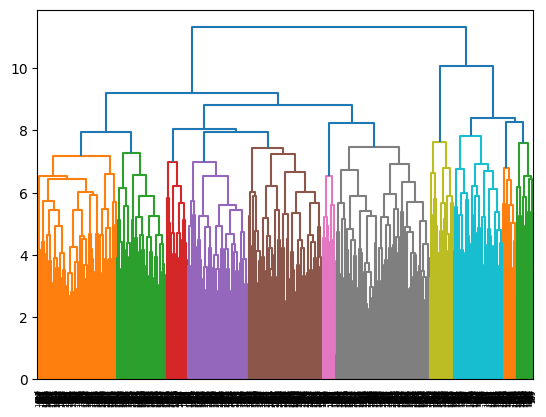

In [8]:
# Creating a complete linkage dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='complete'))

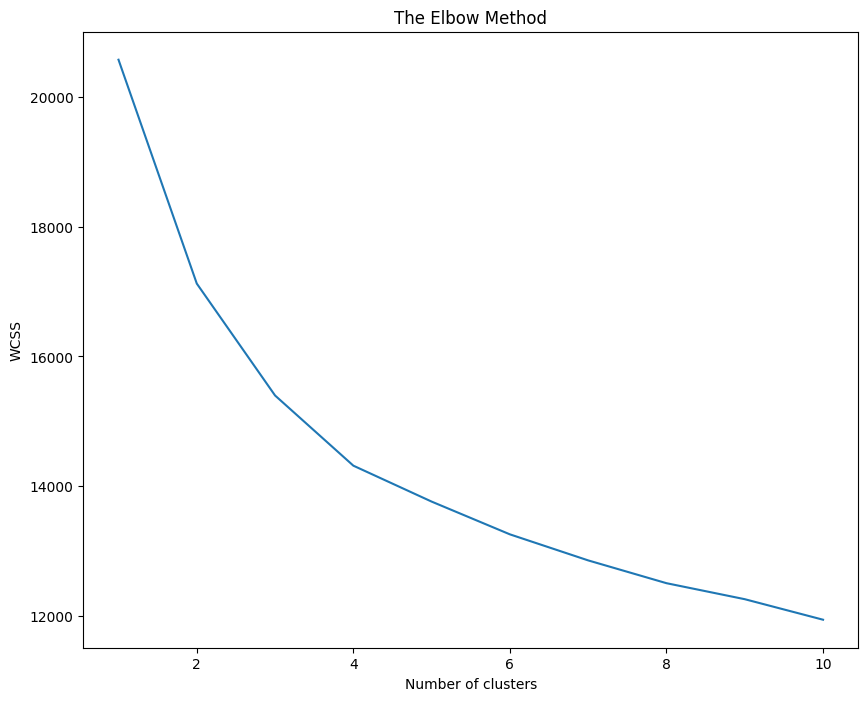

In [9]:
plt.figure(figsize=(10, 8))
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We will go with clusters = 4, as we interpret it from the elbow diagram.

In [10]:
number_clusters = 4

#K Means
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = 42)
kmeans_model = kmeans.fit(df)
y_kmeans = kmeans_model.predict(df)

#Hierarchical
hc = AgglomerativeClustering(n_clusters = number_clusters, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(df)

In [11]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1
y_hc1=y_hc+1

In [12]:
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
data['cluster_kmeans'] = cluster

cluster = list(y_hc1)
# Adding cluster to our data set
data['cluster_hc'] = cluster

In [13]:
filtered_data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','RelationshipSatisfaction','BusinessTravel'], axis=1)

In [14]:
kmeans_mean_cluster = pd.DataFrame(round(filtered_data.groupby('cluster_kmeans').mean(),1))
kmeans_mean_cluster

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,cluster_hc
cluster_kmeans,,,,,,,,,,,,
1,47.3,9.0,3.1,2.7,4.0,2.7,15141.9,3.4,0.7,24.6,6.7,2.0
2,32.7,8.5,2.8,2.7,1.4,2.7,3912.7,2.1,0.2,7.5,3.2,1.2
3,36.9,9.9,3.0,2.8,1.7,2.7,4695.5,3.2,1.5,9.5,3.9,2.5
4,34.7,9.3,2.9,2.7,2.0,2.8,5687.8,2.4,0.8,8.8,4.1,2.5


In [15]:
# Getting rid of job satisfaction and environment satisfaction as they are not important
kmeans_mean_cluster = kmeans_mean_cluster.drop(['JobSatisfaction','EnvironmentSatisfaction','cluster_hc'], axis=1)
kmeans_mean_cluster

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole
cluster_kmeans,,,,,,,,,
1,47.3,9.0,3.1,4.0,15141.9,3.4,0.7,24.6,6.7
2,32.7,8.5,2.8,1.4,3912.7,2.1,0.2,7.5,3.2
3,36.9,9.9,3.0,1.7,4695.5,3.2,1.5,9.5,3.9
4,34.7,9.3,2.9,2.0,5687.8,2.4,0.8,8.8,4.1


In [16]:
#hierarchical_cluster  = pd.DataFrame(round(filtered_data.groupby('cluster_hc').mean(),1))
#hierarchical_cluster

In [17]:
def cluster_characteristics(cluster):
    return (cluster.describe().iloc[1].to_frame().T.to_html()) \
    + ('-----------Attrition-----------') \
    + (cluster['Attrition'].value_counts().to_frame().T.to_html()) \
    + ('-----------Department-----------') \
    + (cluster['Department'].value_counts().to_frame().T.to_html()) \
    + ('-----------EducationField-----------') \
    + (cluster['EducationField'].value_counts().to_frame().T.to_html()) \
    + ('-----------Gender-----------') \
    + (cluster['Gender'].value_counts().to_frame().T.to_html()) \
    + ('-----------JobRole-----------') \
    + (cluster['JobRole'].value_counts().to_frame().T.to_html()) \
    + ('-----------MaritalStatus-----------') \
    + (cluster['MaritalStatus'].value_counts().to_frame().T.to_html())

In [18]:
#Dropping unnecessary columns

def drop_unnecessary_columns (cluster):
    cluster = cluster.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','JobInvolvement','OverTime','PercentSalaryHike','PerformanceRating','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','DailyRate','MonthlyRate','HourlyRate','cluster_kmeans','cluster_hc','RelationshipSatisfaction','BusinessTravel'], axis=1)
    return cluster

In [19]:
kmeans_clusters = []
for i in range(1, number_clusters+1):
    kmeans_clusters.append(drop_unnecessary_columns(data[data.cluster_kmeans == i]))

hierarchical_clusters = []
for i in range(1, number_clusters+1):
    hierarchical_clusters.append(drop_unnecessary_columns(data[data.cluster_hc == i]))

In [20]:

def print_all_clusters(clusters):
    html_string = '<h1>Clustering Results</h1> <br/>'
    index = 1
    for cluster in clusters:
        html_string += '<h1>Cluster ' + str(index) + '</h1>'
        html_string += cluster_characteristics(cluster)
        html_string += '<br/>'
        index += 1

    display_html(html_string, raw=True)

In [21]:

print ('----------------KMeans Clustering----------------')
print_all_clusters (kmeans_clusters)

----------------KMeans Clustering----------------


Clustering Results Cluster 1 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 47.309237 
 9.036145 
 3.056225 
 2.690763 
 3.975904 
 2.678715 
 15141.899598 
 3.445783 
 0.742972 
 24.590361 
 6.710843 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 230 
 19 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Sales 
 Human Resources 
 
 
 
 
 Department 
 175 
 61 
 13 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Marketing 
 Technical Degree 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 100 
 87 
 26 
 20 
 10 
 6 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 134 
 115 
 
 
 -----------JobRole----------- 
 
 
 
 Manager 
 Research Director 
 Healthcare Representative 
 Manufacturing Director 
 Sales Executive 
 Laboratory Technician 
 Human Resources 
 Research Scientist 
 
 
 
 
 JobRole 
 97 
 68 
 28 
 26 
 25 
 2 
 2 
 1 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Single 
 Divorced 
 
 
 
 
 MaritalStatus 
 133 
 63 
 53 
 
 
 Cluster 2 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 32.719128 
 8.474576 
 2.765133 
 2.711864 
 1.411622 
 2.743341 
 3912.716707 
 2.053269 
 0.169492 
 7.452785 
 3.232446 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 320 
 93 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 
 
 
 
 Department 
 389 
 24 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 183 
 146 
 46 
 29 
 9 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 246 
 167 
 
 
 -----------JobRole----------- 
 
 
 
 Research Scientist 
 Laboratory Technician 
 Manufacturing Director 
 Healthcare Representative 
 Human Resources 
 Research Director 
 Manager 
 
 
 
 
 JobRole 
 167 
 130 
 53 
 34 
 24 
 4 
 1 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Single 
 Married 
 
 
 
 
 MaritalStatus 
 271 
 142 
 
 
 Cluster 3 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 36.892019 
 9.875587 
 2.974178 
 2.776995 
 1.65493 
 2.701878 
 4695.495305 
 3.157277 
 1.460094 
 9.469484 
 3.870892 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 385 
 41 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 Sales 
 
 
 
 
 Department 
 396 
 26 
 4 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Other 
 Human Resources 
 Marketing 
 
 
 
 
 EducationField 
 196 
 152 
 36 
 28 
 12 
 2 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 275 
 151 
 
 
 -----------JobRole----------- 
 
 
 
 Laboratory Technician 
 Research Scientist 
 Healthcare Representative 
 Manufacturing Director 
 Human Resources 
 Research Director 
 Manager 
 Sales Executive 
 
 
 
 
 JobRole 
 127 
 123 
 69 
 66 
 26 
 8 
 4 
 3 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Divorced 
 
 
 
 
 MaritalStatus 
 224 
 202 
 
 
 Cluster 4 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 34.735602 
 9.308901 
 2.910995 
 2.691099 
 1.979058 
 2.774869 
 5687.808901 
 2.376963 
 0.759162 
 8.759162 
 4.089005 
 
 
 -----------Attrition----------- 
 
 
 

In [22]:

print ('----------------Hierarchical Clustering----------------')
print_all_clusters (hierarchical_clusters)

----------------Hierarchical Clustering----------------


Clustering Results Cluster 1 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 34.89359 
 9.037179 
 2.919231 
 2.729487 
 1.644872 
 2.723077 
 4659.391026 
 2.571795 
 0.371795 
 8.734615 
 3.714103 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 612 
 168 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Sales 
 Human Resources 
 
 
 
 
 Department 
 542 
 196 
 42 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Technical Degree 
 Marketing 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 313 
 250 
 84 
 62 
 54 
 17 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 488 
 292 
 
 
 -----------JobRole----------- 
 
 
 
 Research Scientist 
 Laboratory Technician 
 Sales Executive 
 Manufacturing Director 
 Healthcare Representative 
 Sales Representative 
 Human Resources 
 Research Director 
 Manager 
 
 
 
 
 JobRole 
 192 
 190 
 151 
 77 
 74 
 45 
 42 
 5 
 4 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Single 
 Married 
 Divorced 
 
 
 
 
 MaritalStatus 
 407 
 306 
 67 
 
 
 Cluster 2 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 46.948936 
 8.744681 
 2.948936 
 2.782979 
 3.978723 
 2.634043 
 15113.2 
 3.468085 
 0.685106 
 24.238298 
 6.47234 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 222 
 13 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Sales 
 Human Resources 
 
 
 
 
 Department 
 168 
 55 
 12 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Marketing 
 Technical Degree 
 Other 
 Human Resources 
 
 
 
 
 EducationField 
 94 
 83 
 22 
 19 
 12 
 5 
 
 
 -----------Gender----------- 
 
 
 
 Male 
 Female 
 
 
 
 
 Gender 
 129 
 106 
 
 
 -----------JobRole----------- 
 
 
 
 Manager 
 Research Director 
 Manufacturing Director 
 Healthcare Representative 
 Sales Executive 
 Human Resources 
 Laboratory Technician 
 Research Scientist 
 
 
 
 
 JobRole 
 94 
 63 
 30 
 24 
 19 
 2 
 2 
 1 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Married 
 Single 
 Divorced 
 
 
 
 
 MaritalStatus 
 122 
 63 
 50 
 
 
 Cluster 3 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 40.126761 
 9.478873 
 3.450704 
 2.492958 
 2.197183 
 2.732394 
 7277.957746 
 5.098592 
 1.943662 
 13.084507 
 4.84507 
 
 
 -----------Attrition----------- 
 
 
 
 No 
 Yes 
 
 
 
 
 Attrition 
 64 
 7 
 
 
 -----------Department----------- 
 
 
 
 Research & Development 
 Human Resources 
 Sales 
 
 
 
 
 Department 
 61 
 9 
 1 
 
 
 -----------EducationField----------- 
 
 
 
 Life Sciences 
 Medical 
 Human Resources 
 Technical Degree 
 Other 
 
 
 
 
 EducationField 
 32 
 30 
 5 
 2 
 2 
 
 
 -----------Gender----------- 
 
 
 
 Female 
 Male 
 
 
 
 
 Gender 
 45 
 26 
 
 
 -----------JobRole----------- 
 
 
 
 Research Scientist 
 Manufacturing Director 
 Healthcare Representative 
 Research Director 
 Human Resources 
 Laboratory Technician 
 Manager 
 
 
 
 
 JobRole 
 19 
 12 
 12 
 10 
 8 
 6 
 4 
 
 
 -----------MaritalStatus----------- 
 
 
 
 Divorced 
 Married 
 
 
 
 
 MaritalStatus 
 44 
 27 
 
 
 Cluster 4 
 
 
 
 Age 
 DistanceFromHome 
 Education 
 EnvironmentSatisfaction 
 JobLevel 
 JobSatisfaction 
 MonthlyIncome 
 NumCompaniesWorked 
 StockOptionLevel 
 TotalWorkingYears 
 YearsInCurrentRole 
 
 
 
 
 mean 
 34.320312 
 9.729167 
 2.778646 
 2.710938 
 1.71875 
 2.796875 
 4835.018229 
 2.020833 
 1.505208 
 8.184896 
 3.789062 
 
 


After analysis, we label clusters 1 & 3 as ideal ones i.e. if the new employee falls in either of these we can say that they employee might be a better fit, as we see that attrition is very low in those clusters and also environment satisfaction is better as compared to 2 & 4

Now, we will test bias using kmeans clustering by passing the same set of features but by just varying the features in question.
We want to test bias on following 4 features:

1. Age
2. Gender
3. Distance From Home 
4. Marital Status

In [23]:
data_1 = data.replace({'Gender': {'Male': 1, 'Female': 0}, 'Attrition': {'Yes': 1, 'No': 0}, 'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2}, 'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, 'EducationField': {'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, 'JobRole': {'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8}})


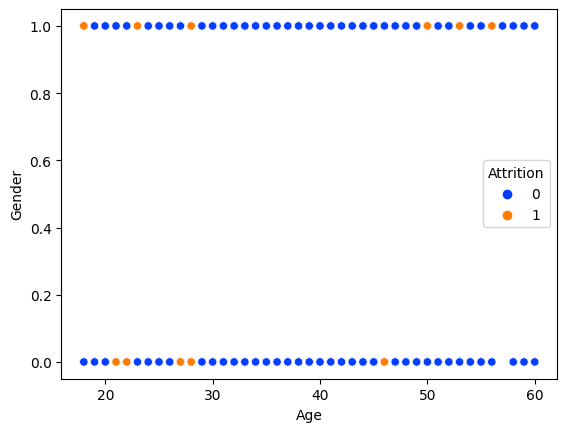

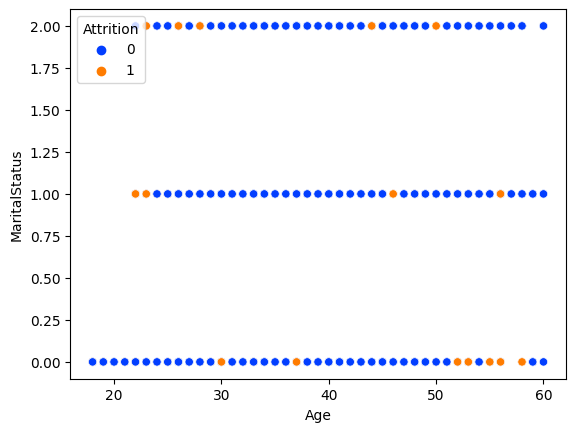

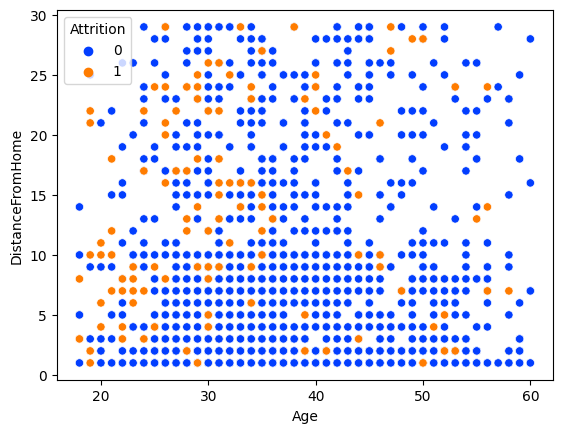

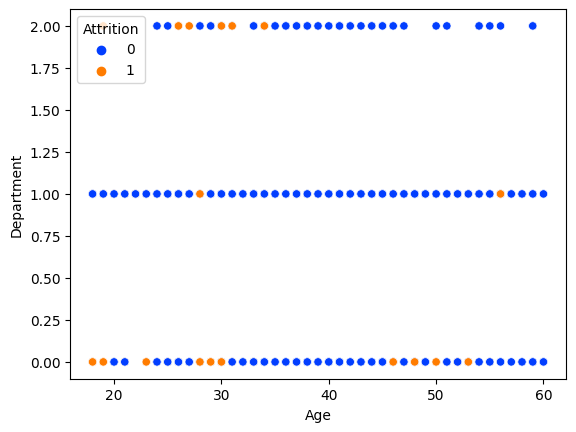

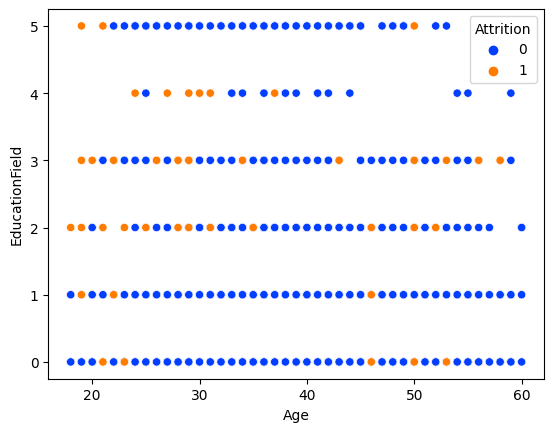

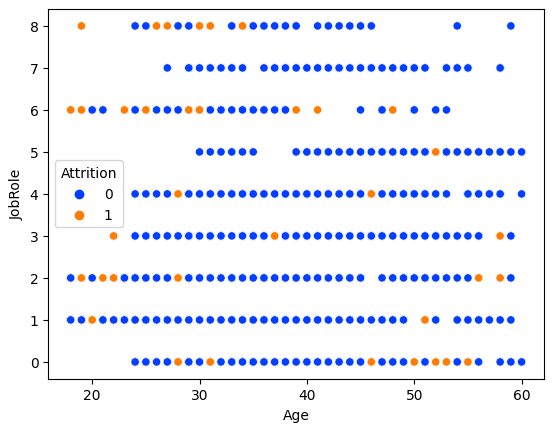

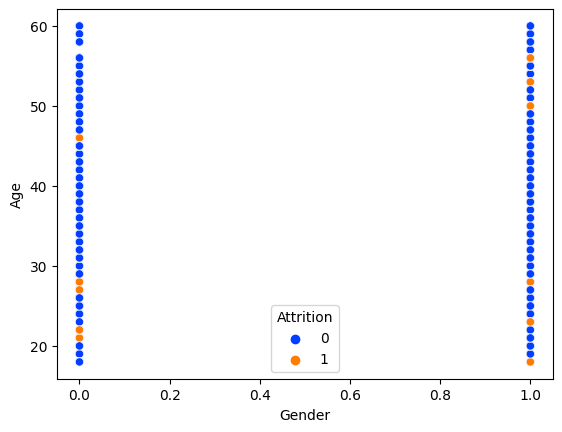

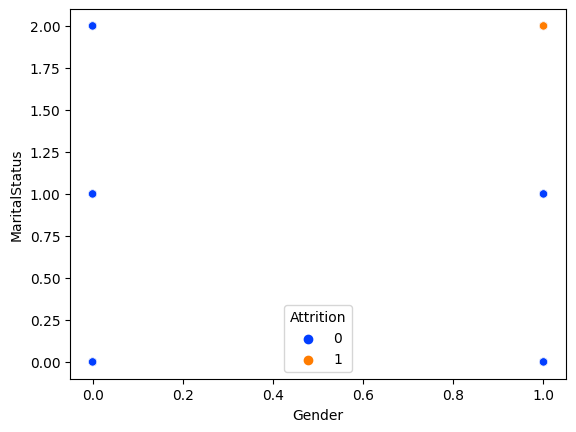

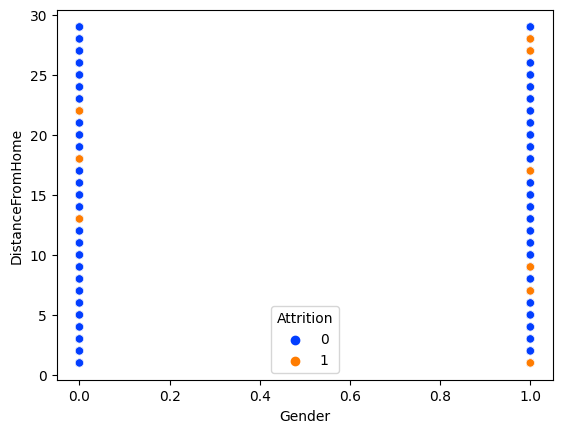

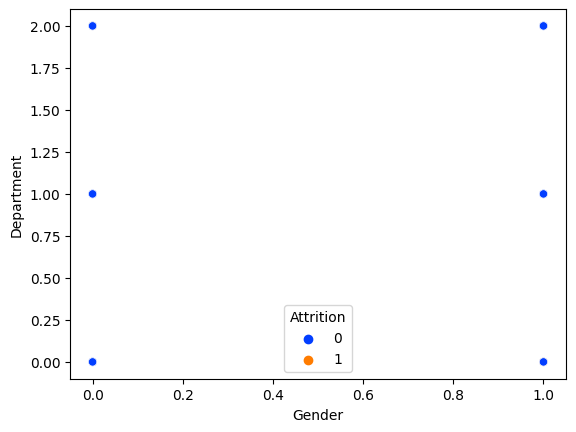

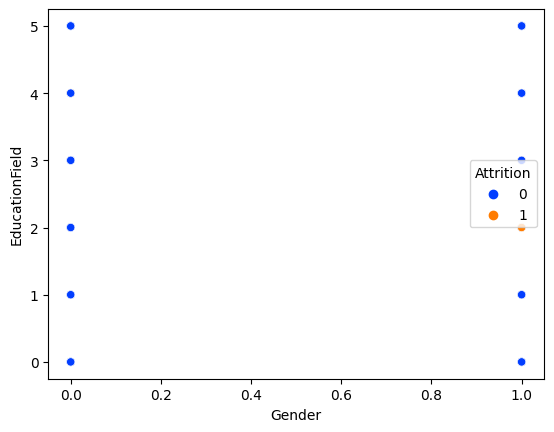

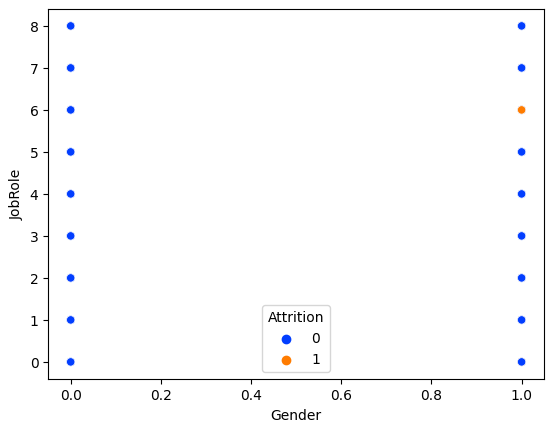

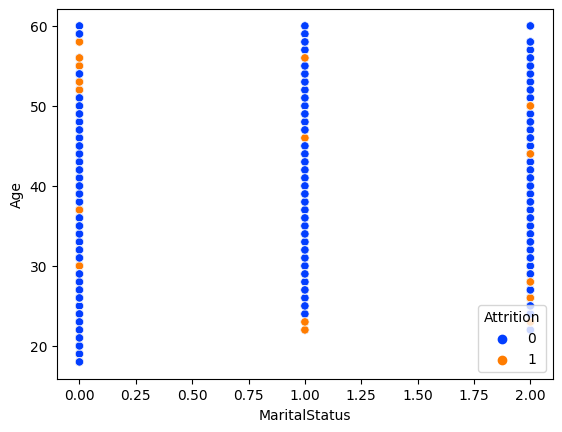

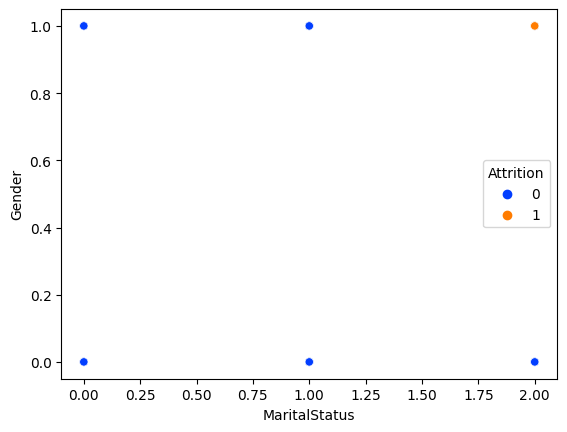

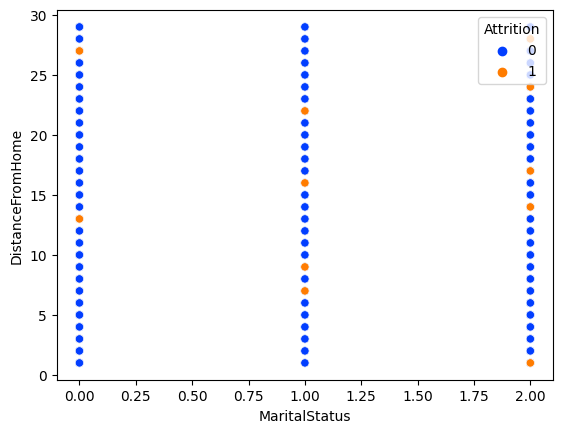

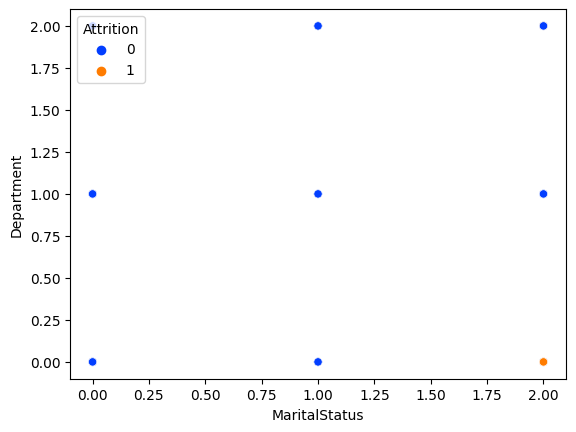

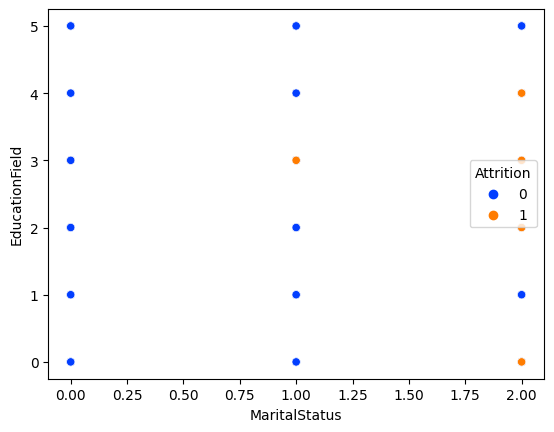

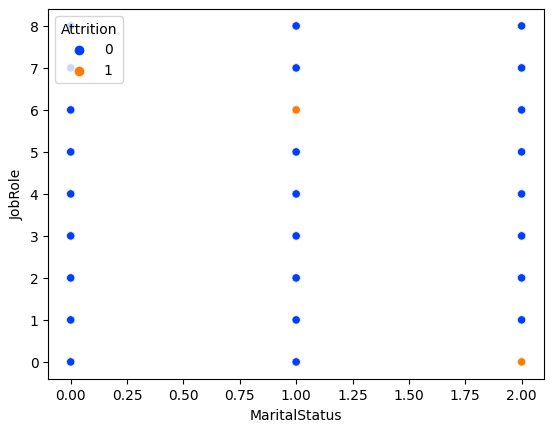

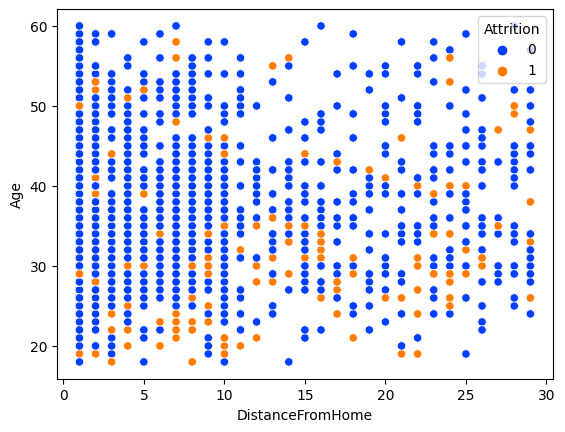

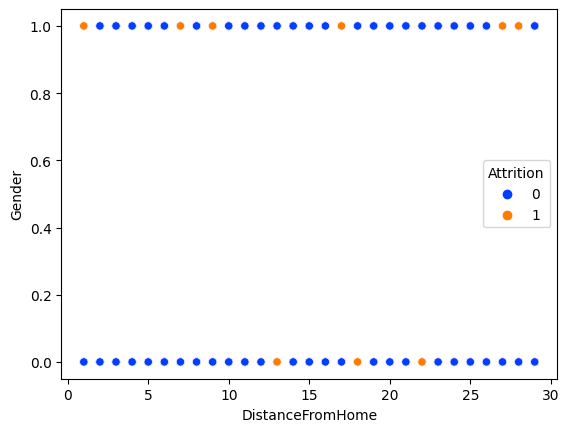

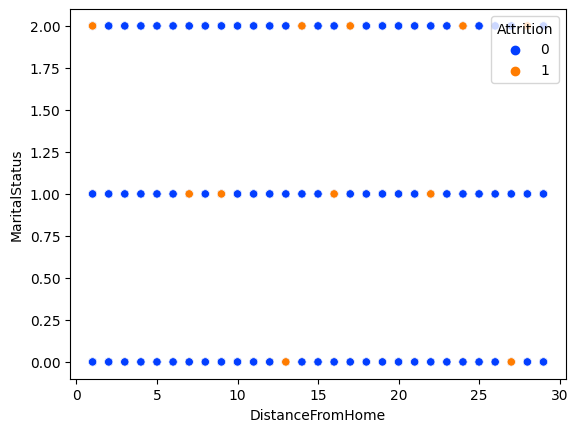

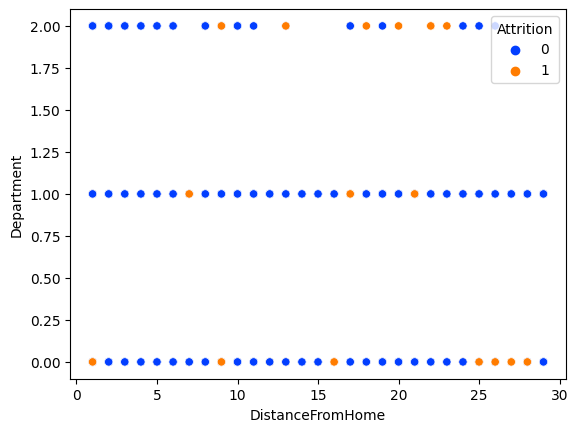

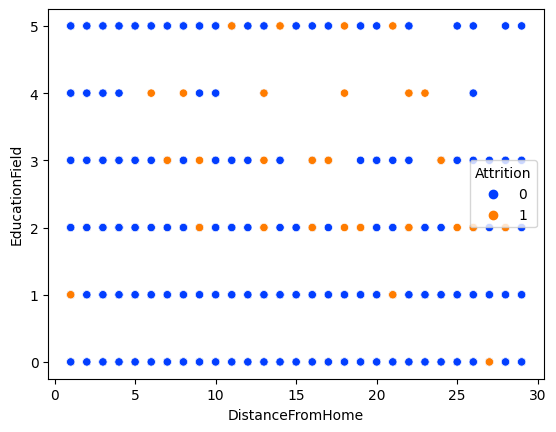

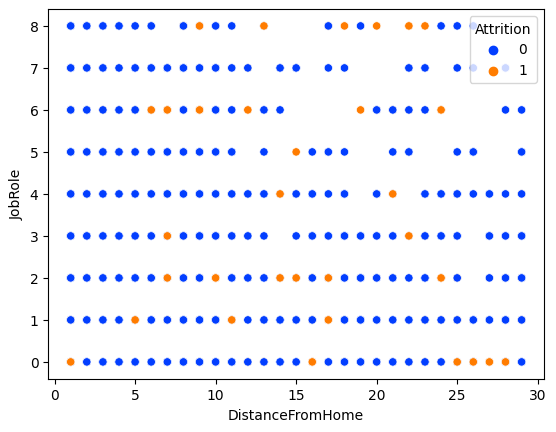

In [24]:
x = ['Age','Gender','MaritalStatus','DistanceFromHome']
y = ['Age','Gender','MaritalStatus','DistanceFromHome','Department','EducationField','JobRole']

for i in x:
    for j in y:
        if i != j:
            sns.scatterplot(data=data_1, x=i, y=j, hue='Attrition', palette='bright')
            plt.show()

In [25]:
new_employee_data = pd.read_csv('data/Testing/new_employee_data.csv')

new_employee_data = convert_to_numeric(new_employee_data)
new_employee_data = StandardScaler().fit_transform(new_employee_data) 

kmeans_model.predict(new_employee_data)

array([3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)